<a href="https://colab.research.google.com/github/Sharis-786/EDA_Pyhton/blob/main/Excercise/Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step-1: import the given file using appropriate pandas function, store it in a dataframe and read the first 3 rows.
'''IMP: There are 2 sheets in the given file i.e. App Store Games and Data Dictionary.
      Load App Store Games sheet for analysis. Pass the sheet name as an argument(sheet_name) to the function(read_excel).
      '''

df = pd.read_excel('/content/App Store Games English.xlsx')
df.head(3)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11


In [3]:
# Step-2: Check the shape of the dataset

df.shape

(17007, 16)

In [4]:
# Step-3: Check the datatype of all the columns
df.dtypes

,0
App URL,object
App ID,int64
Name,object
Subtitle,object
Icon URL,object
Average User Rating,float64
User Rating Count,float64
Price per App (USD),float64
Description,object
Developer,object


In [5]:
# Step-4: Check the total no. of duplicate rows, remove them and also reset the index.
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

In [6]:
# Step-5: Check the no. of missing values in each column
df.isnull().sum()


,0
App URL,0
App ID,0
Name,1
Subtitle,11638
Icon URL,0
Average User Rating,9359
User Rating Count,9359
Price per App (USD),0
Description,17
Developer,0


In [7]:
# Step-6: Impute the missing values and explain your strategy for each column
for i in df['Primary Genre'].unique():
  df.loc[df['Primary Genre'] == i, 'User Rating Count'] = df[df['Primary Genre'] == i]['User Rating Count'].fillna(df[df['Primary Genre'] == i]['User Rating Count'].mean())
  df.loc[df['Primary Genre'] == i, 'Average User Rating'] = df[df['Primary Genre'] == i]['Average User Rating'].fillna(df[df['Primary Genre'] == i]['Average User Rating'].mean())


In [8]:
df['Size in Bytes'].fillna(df['Size in Bytes'].mean(), inplace=True)
df['Description'].fillna('No Description', inplace=True)
df['Subtitle'].fillna('No Subtitle', inplace=True)
df['Name'].fillna('Negative', inplace=True)
df.isnull().sum()

# Ratings were imputed by average of there corresponding genre rating
# Size in byte was imputed by average of the value in that feature
# name was imputed by name in app url
# descrption and subtile was imputed by no descrption and no subtitle respectively

,0
App URL,0
App ID,0
Name,0
Subtitle,0
Icon URL,0
Average User Rating,0
User Rating Count,0
Price per App (USD),0
Description,0
Developer,0


In [9]:
# Step-7: Sort the DataFrame by 'Size in Bytes' column in decending order
df.sort_values(by='Size in Bytes', ascending=False, inplace=True)

In [10]:
# Step-8: Create 3 new columns
# 1. 'Year' - > by extracting year from Release Date column
# HINT: df['Release Date'].dt.year
df['Year']=df['Release Date'].dt.year


In [11]:
# 2. 'Paid or Free' -> using lambda function on 'Price per App (USD)' where price = 0 assign'Free' else 'Paid'.
df['Paid or Free'] = df['Price per App (USD)'].apply(lambda x: 'Free' if x == 0 else 'Paid')

In [12]:
# 3. 'Revenue' -> 'User Rating Count' * 'Price per App (USD)'
df['Revenue'] = df['User Rating Count'] * df['Price per App (USD)']

In [13]:
df.shape
df.head(10)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or Free,Revenue
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,No Subtitle,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",4.005591e+09,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,"Epic tactics, massive battles",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.916692e+09,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",No Subtitle,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3.747743e+09,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",Build. Conquer. Inspire.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3.716898e+09,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,Fight for Rome or destroy it,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.599436e+09,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27
3868,https://apps.apple.com/us/app/xcom-enemy-withi...,881270303,XCOM\xae: Enemy Within,No Subtitle,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,4305.0,4.99,"***NOTE: Compatible with iPad 3, iPad mini 2, ...",2K,17+,"EN, FR, DE, IT, JA, KO, PL, RU, ES",3.518278e+09,Games,"Games, Strategy, Action",2014-11-13,2014,Paid,21481.95
15665,https://apps.apple.com/us/app/shieldwall-chron...,1447669050,Shieldwall Chronicles,An exciting tactical RPG.,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.5,25.0,9.99,Languages: English\nSupported Devices: iPad A...,Wave Light Games Inc.,12+,EN,3.323805e+09,Games,"Games, Strategy, Role Playing",2019-02-22,2019,Paid,249.75
8331,https://apps.apple.com/us/app/banner-saga-2/id...,1107741196,Banner Saga 2,No Subtitle,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,563.0,9.99,The epic award winning story-based role-playin...,Stoic,9+,"EN, FR, DE, PL, PT, RU, ES",3.321083e+09,Games,"Games, Entertainment, Role Playing, Strategy",2016-09-28,2016,Paid,5624.37
7181,https://apps.apple.com/us/app/mission-1545/id1...,1056668779,Mission 1545,No Subtitle,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,10.0,1.99,Rescue mission set on the dark side of Tudor L...,City Quests,4+,EN,3.181755e+09,Games,"Games, Strategy, Education, Adventure",2015-12-17,2015,Paid,19.90
4383,https://apps.apple.com/us/app/icewind-dale/id9...,909472985,Icewind Dale,Enhanced Edition,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,279.0,9.99,"""Evil stirs beneath the Spine of the World.\n\...",Overhaul Games,12+,EN,2.996021e+09,Games,"Games, Strategy, Role Playing",2014-11-08,2014,Paid,2787.21


In [14]:
# Step 9: Convert the values in 'Size in Bytes' column into MB
# HINT: bytes to KB - > df['Size in Bytes']/1024
#         KB to MB - > df['Size in Bytes']/1024/1024
df['Size in MB']=df['Size in Bytes']/1024/1024
df['Size in MB']

,Size in MB
11849,3820.029297
8313,3735.249023
2128,3574.125977
11618,3544.709961
10367,3432.689453
...,...
1081,0.303286
593,0.276380
702,0.230689
226,0.205841


In [15]:
# Step 10: Rename the columns to lowercase and remove spaces also change 'Size in Bytes' to 'Size (MB)'
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'size_in_bytes': 'size_(b)'}, inplace=True)


In [16]:
df.columns

Index(['app_url', 'app_id', 'name', 'subtitle', 'icon_url',
       'average_user_rating', 'user_rating_count', 'price_per_app_(usd)',
       'description', 'developer', 'age_rating', 'languages', 'size_(b)',
       'primary_genre', 'genres', 'release_date', 'year', 'paid_or_free',
       'revenue', 'size_in_mb'],
      dtype='object')

In [17]:
# Step 11: Creating a new column 'size_buckets' for Size Buckets using a custom function
''' HINT:
     (if size(MB) < 100)        -> 'Under 100MB'
    (if 100 <= size(MB) < 500)  -> '100 - 500MB'
    (if 500 <= size(MB) < 1024) -> '500 - 1GB'
             else               -> 'Above 1GB'
'''
def size_bucket(size):
  if size < 100:
    return  'Under 100MB'
  elif 100 <= size < 500:
    return '100 - 500MB'
  elif 500 <= size < 1024:
    return '500 - 1GB'
  else:
    return 'Above 1GB'

df['size_buckets'] = df['size_in_mb'].apply(size_bucket)
df.head()

,app_url,app_id,name,subtitle,icon_url,average_user_rating,user_rating_count,price_per_app_(usd),description,developer,...,languages,size_(b),primary_genre,genres,release_date,year,paid_or_free,revenue,size_in_mb,size_buckets
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,No Subtitle,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,...,"EN, FR, DE, IT, RU, ES",4.005591e+09,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15,3820.029297,Above 1GB
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,"Epic tactics, massive battles",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,...,"EN, FR, DE, IT, RU, ES",3.916692e+09,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50,3735.249023,Above 1GB
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",No Subtitle,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,...,EN,3.747743e+09,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74,3574.125977,Above 1GB
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",Build. Conquer. Inspire.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",...,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3.716898e+09,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00,3544.709961,Above 1GB
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,Fight for Rome or destroy it,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,...,"EN, FR, DE, IT, RU, ES",3.599436e+09,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27,3432.689453,Above 1GB


In [18]:
# Step 12: Check the value counts in each size bucket
for i in df['size_buckets'].unique():
  print(df[df['size_buckets'] == i]['size_buckets'].value_counts())

size_buckets
Above 1GB    129
Name: count, dtype: int64
size_buckets
500 - 1GB    360
Name: count, dtype: int64
size_buckets
100 - 500MB    4850
Name: count, dtype: int64
size_buckets
Under 100MB    11508
Name: count, dtype: int64


In [19]:
# Step 13: Drop the columns not required in analysis
'''
Icon URL
Developer
App URL
Description
Languages
Genres
Release Date
Size (MB)'''
df.drop(columns=['icon_url', 'developer', 'app_url', 'description', 'languages', 'genres', 'release_date', 'size_(b)'], inplace=True)
df.columns

Index(['app_id', 'name', 'subtitle', 'average_user_rating',
       'user_rating_count', 'price_per_app_(usd)', 'age_rating',
       'primary_genre', 'year', 'paid_or_free', 'revenue', 'size_in_mb',
       'size_buckets'],
      dtype='object')

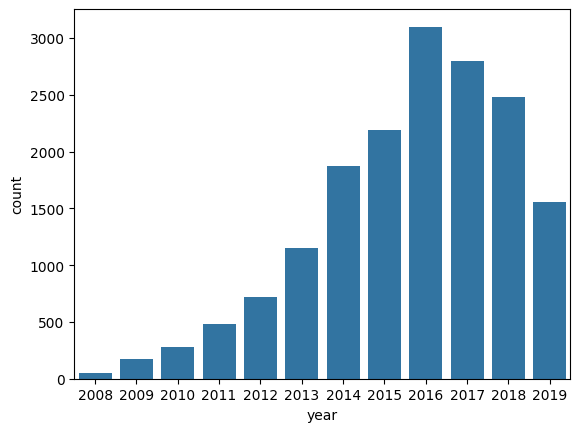

In [20]:
# Step 14: Show the no. of Games launched each year using a bar graph
sns.countplot(x='year', data=df)
plt.show()

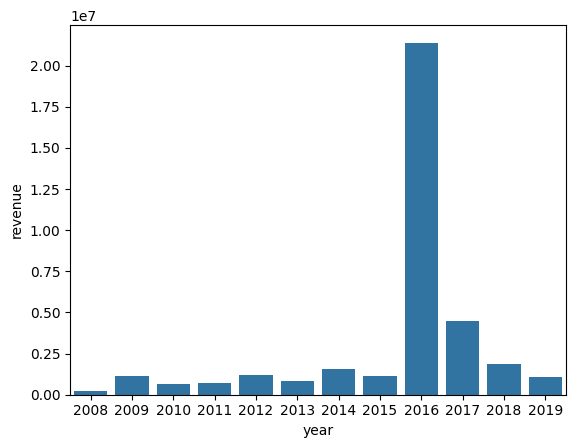

In [21]:
# Step 15: Calculate Revenue by year, save in a subset and plot using a bar graph
df_revenue = df.groupby('year')['revenue'].sum().reset_index()
sns.barplot(x='year', y='revenue', data=df_revenue)
plt.show()

In [22]:
# Step 16: Use the groupby function to show top 10 Games by Rating Count
df.groupby('name')['user_rating_count'].sum().sort_values(ascending=False).head(10)

,user_rating_count
name,
Clash of Clans,3032734.0
Clash Royale,1277095.0
PUBG MOBILE,711409.0
Plants vs. Zombies\u2122 2,469562.0
Pok\xe9mon GO,439776.0
Boom Beach,400787.0
"Cash, Inc. Fame & Fortune Game",374772.0
Idle Miner Tycoon: Cash Empire,283035.0
TapDefense,273687.0
